<a href="https://colab.research.google.com/github/vinzk251997/webots/blob/master/Spark_Foundation_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('/content/Iris.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

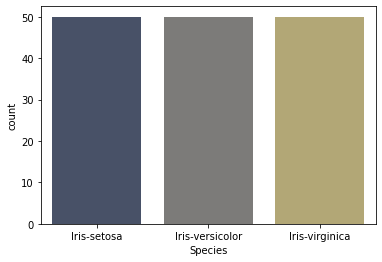

In [ ]:
sns.countplot(x="Species", data=df, palette='cividis')

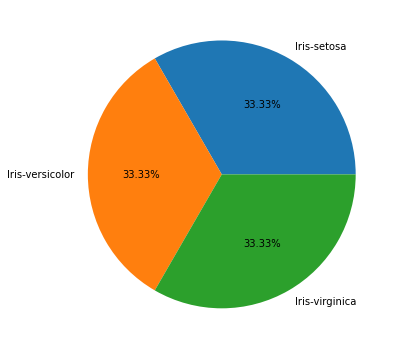

In [ ]:
plt.figure(figsize=(6, 8))
plt.pie(df['Species'].value_counts().values, labels= df['Species'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [ ]:
x=df.drop(["Id","Species"],axis=1)
y=df["Species"]
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify=df.Species)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=3)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_predict=dTree.predict(x_test)

In [ ]:
Accu=accuracy_score(y_predict,y_test)
print('Accuracy Score=',a*100,'%')

Accuracy Score= 90.0 %


In [ ]:
pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

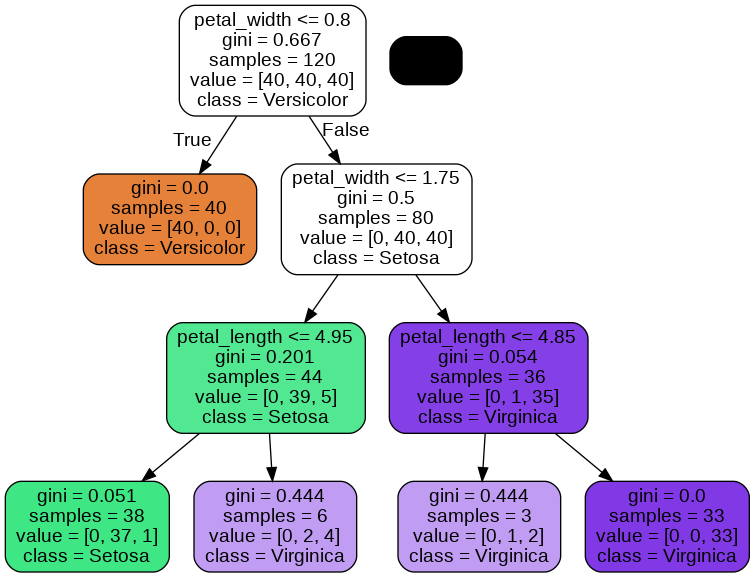

In [ ]:
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(dTree, out_file=None, filled=True, rounded=True,
                                feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],class_names=['Versicolor','Setosa','Virginica'])
graph = pydotplus.graph_from_dot_data(dot_data)  
image=graph.create_png()
graph.write_png("kmc_dt.png")
Image(filename="kmc_dt.png")